# MiniNet - a small neural network

Illustrations and examples of using convolutional neural networks applied to images.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

## Load the data

We use the MNIST digits dataset for the examples here.

In [2]:
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Input, Dense
from keras.layers import Activation, Flatten
from keras.layers import MaxPool2D

from keras.datasets import mnist
from keras import utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert our data into a rank 3 tensor
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float64)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float64)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

# For experimenting we could add some noise to each image
#X_train_noisy = X_train + 0.05 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

Using TensorFlow backend.


## Network Architecture

In [9]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

In [10]:
convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
history_callback = convnet.fit(X_train, y_train,
                               batch_size=128,
                               epochs=20, verbose=1,
                               validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 32s 755us/step - loss: 0.2261 - acc: 0.9316 - val_loss: 0.0857 - val_acc: 0.9736
Epoch 2/20
42000/42000 [==============================] - 30s 725us/step - loss: 0.0608 - acc: 0.9809 - val_loss: 0.0667 - val_acc: 0.9798
Epoch 3/20
42000/42000 [==============================] - 30s 716us/step - loss: 0.0408 - acc: 0.9874 - val_loss: 0.0536 - val_acc: 0.9840
Epoch 4/20
42000/42000 [==============================] - 32s 761us/step - loss: 0.0308 - acc: 0.9901 - val_loss: 0.0504 - val_acc: 0.9852
Epoch 5/20
42000/42000 [==============================] - 34s 819us/step - loss: 0.0240 - acc: 0.9925 - val_loss: 0.0383 - val_acc: 0.9891
Epoch 6/20
42000/42000 [==============================] - 31s 749us/step - loss: 0.0180 - acc: 0.9943 - val_loss: 0.0462 - val_acc: 0.9876
Epoch 7/20
42000/42000 [==============================] - 33s 791us/step - loss: 0.0131 - acc: 0.9956 - val_loss: 0.

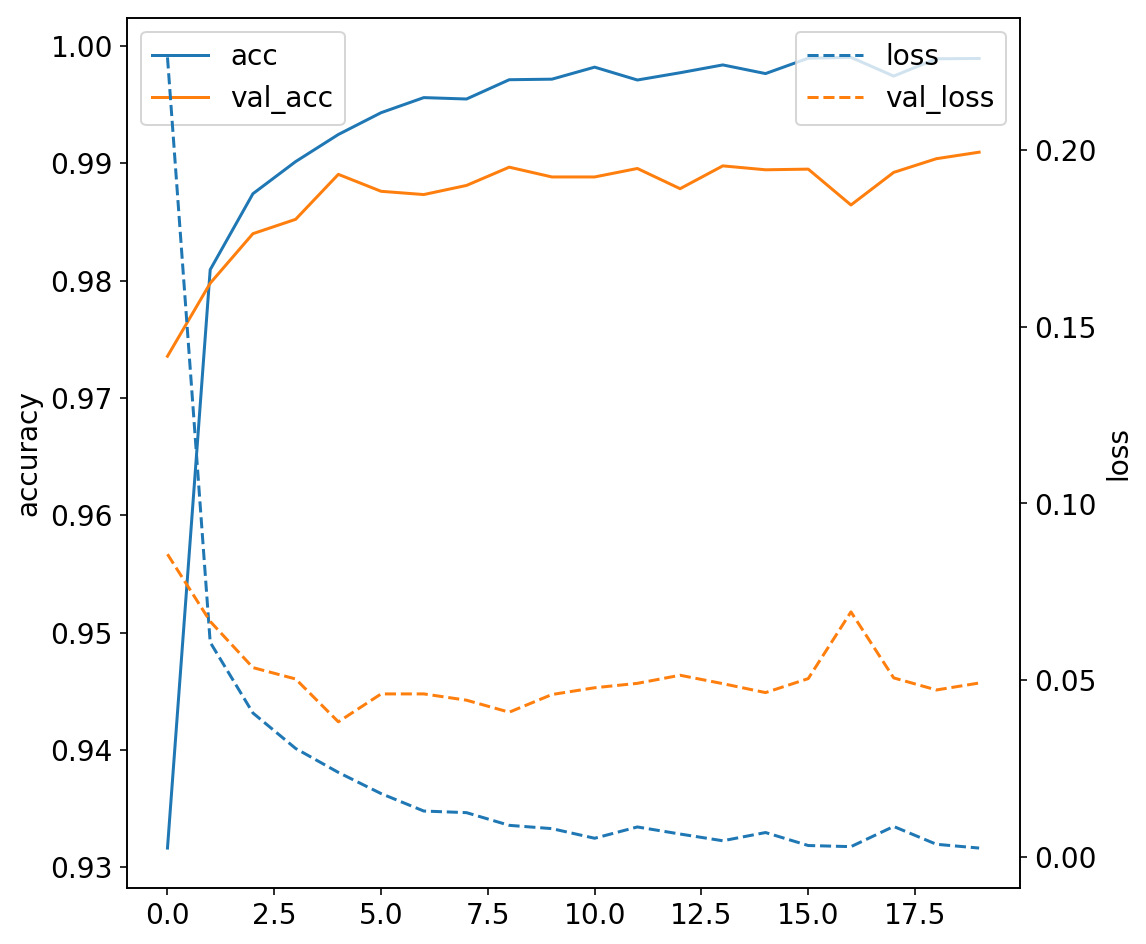

In [12]:
import pandas as pd


df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");